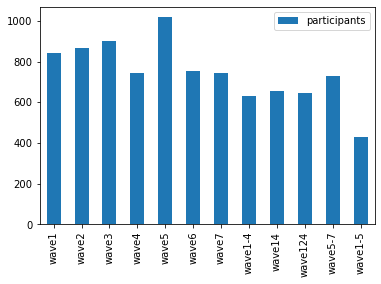

In [1]:
#Notes
#read literature for research question
#check for reverse questions
#decide what to do for the nan values in percentage change

import numpy as np
import pandas as pd
import datetime
import pandas_profiling as pp
from IPython.display import display, HTML
import pymannkendall as mk
%matplotlib inline

pd.options.display.max_rows = 10
pd.options.display.width = 200
np.set_printoptions(precision = 4, suppress = True) 

legit_classes1 = [67,71,72,74,77,78,79,81,83,86,100,101,103,121,122,125,126,127,129,130,131,133,135,138]
legit_classes2 = [73,74,78,81,82,86,100,103,124,125,131,133,135,141,250,251,256,258,259,261,262,263,272,273,277,279,290,291,292,296,297,298,299,300,301,302,303,304,305,306,307,308,310]
participants = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/8. Metadata/Participant_Info.csv", sep= ';')

par_w1 = participants["W1"] == 1
par_w2 = participants["W2"] == 1
par_w3 = participants["W3"] == 1
par_w4 = participants["W4"] == 1
par_w5 = participants["W5"] == 1
par_w6 = participants["W6"] == 1
par_w7 = participants["W7"] == 1

total1 = len(participants[par_w1])
total2 = len(participants[par_w3])
total3 = len(participants[par_w2])
total4 = len(participants[par_w4])
total5 = len(participants[par_w5])
total6 = len(participants[par_w6])
total7 = len(participants[par_w7])
total1_4 = len(participants[par_w1 & par_w2 & par_w3 & par_w4])
total14 = len(participants[par_w1 & par_w4])
total124 = len(participants[par_w1 & par_w2 & par_w4])
total5_7 = len(participants[par_w5 & par_w6 & par_w7])
total1_5 = len(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5])

par_per_wave = pd.DataFrame({
    'participants': [total1, total2, total3, total4, total5, total6, total7, total1_4, total14, total124, total5_7, total1_5]}, index=['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave1-4', 'wave14','wave124', 'wave5-7', 'wave1-5'])

par_per_wave.plot.bar()


#display(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5 & par_w6 & par_w7])
#print(participants[par_w1 & par_w2 & par_w3 & par_w4].count)


In [2]:
#getting participants from 1 to 3
participants1_3 = participants[['Child','Class_Y1']][par_w1 & par_w2 & par_w3]
participants1_3 = participants1_3[participants1_3["Class_Y1"].isin(legit_classes1)]
par_13 = participants1_3
participants1_3 = participants1_3["Child"].tolist()
schools = participants['School'][participants['Child'].isin(participants1_3)].unique().tolist()
display(schools)

participants5_7 = participants[['Child', 'Class_Y3']][par_w5 & par_w6 & par_w7]
participants5_7 = participants5_7[participants5_7["Class_Y3"].isin(legit_classes2)]
participants5_7 = participants5_7["Child"].tolist()

[25, 26, 27, 29, 28, 30, 32, 33, 34, 37, 39, 42, 40]

In [3]:
#fit
#compare waves with eachother as percentage for example
fit_clean = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/5. Fitbit data/Fitbit_W17_cleaned_imputation.csv", sep= ';')
fit_clean1_3 = fit_clean[fit_clean["Child"].isin(participants1_3)]
fit_clean5_7 = fit_clean[fit_clean["Child"].isin(participants5_7)]

fit_clean1_3 = fit_clean1_3[fit_clean1_3["Wave"] <= 3]
fit_clean5_7 = fit_clean5_7[fit_clean5_7["Wave"] > 4]

fit_clean1_3['Date'] = pd.to_datetime(fit_clean1_3['Date'])
fit_clean5_7['Date'] = pd.to_datetime(fit_clean5_7['Date'])

fit_clean1_3['Weekend'] = fit_clean1_3['Date'].dt.day_name()
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Saturday', 'Sunday']))] = 0
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))] = 1

fit_clean5_7['Weekend'] = fit_clean5_7['Date'].dt.day_name()
fit_clean5_7['Weekend'].loc[(fit_clean5_7['Weekend'].isin(['Saturday', 'Sunday']))] = 0
fit_clean5_7['Weekend'].loc[(fit_clean5_7['Weekend'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))] = 1

fit_clean1_3 = fit_clean1_3.drop(columns = ['Day', 'Imputed','Participated', 'Date'])
fit_clean5_7 = fit_clean5_7.drop(columns = ['Day', 'Imputed','Participated', 'Date'])
display(fit_clean1_3[fit_clean1_3['Child'] == 1222])

,School,Class,Child,Sex,Age,Wave,Steps,Minutes_MVPA,Weekend
1726,25,67,1222,1,11.0,1,12620.0,0.0,1
1727,25,67,1222,1,11.0,1,4601.0,0.0,1
1728,25,67,1222,1,11.0,1,3498.0,0.0,0
1729,25,67,1222,1,12.0,2,7554.0,17.0,1
1730,25,67,1222,1,12.0,2,6924.0,13.0,1
1731,25,67,1222,1,12.0,2,3665.0,0.0,1
1732,25,67,1222,1,12.0,3,2845.0,0.0,0
1733,25,67,1222,1,12.0,3,1702.0,0.0,0
1734,25,67,1222,1,12.0,3,8011.0,10.0,1


,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA
0,1222,1,25,67,6906.333333,1,11.0,3498.0,8610.500000,0.000000,0.000000,0.000000
1,1222,2,25,67,6047.666667,1,12.0,NaN,6047.666667,10.000000,NaN,10.000000
2,1222,3,25,67,4186.000000,1,12.0,2273.5,8011.000000,3.333333,0.000000,10.000000
3,1224,1,25,67,6971.000000,1,12.0,7248.0,6555.500000,22.000000,24.333333,18.500000
4,1224,2,25,67,9913.600000,1,12.0,NaN,9913.600000,20.000000,NaN,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3191,2,40,135,10548.250000,1,9.0,10799.0,10297.500000,44.250000,40.000000,48.500000
1076,3191,3,40,135,8701.000000,1,10.0,12417.0,6843.000000,54.666667,111.000000,26.500000
1077,3192,1,40,135,10895.750000,0,10.0,10097.0,11162.000000,50.500000,31.000000,57.000000
1078,3192,2,40,135,10053.250000,0,10.0,5043.0,11723.333333,43.250000,0.000000,57.666667


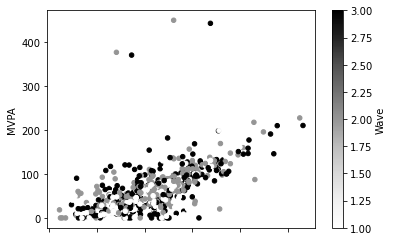

In [4]:
avg_steps_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend','Steps', 'Sex', 'Age']].copy()
avg_mvpa_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend', 'Minutes_MVPA', 'Sex', 'Age']].copy()

temp = avg_steps_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 0]
week_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 1]
weekend_days.columns = ['Child', 'Wave', 'Weekend_steps']
week_days.columns = ['Child', 'Wave', 'Week_steps']

avg_steps_13 = avg_steps_13.groupby(['Child', 'Wave']).mean()
avg_steps_13.columns = ['School', 'Class', 'Steps', 'Sex', 'Age']
avg_steps_13 = avg_steps_13.reset_index()
avg_steps_13 = avg_steps_13.merge(weekend_days, how = 'left')
avg_steps_13 = avg_steps_13.merge(week_days, how = 'left')

temp = avg_mvpa_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 0]
week_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 1]
weekend_mvpa.columns = ['Child', 'Wave', 'Weekend_MVPA']
week_mvpa.columns = ['Child', 'Wave', 'Week_MVPA']

avg_mvpa_13 = avg_mvpa_13.groupby(['Child', 'Wave']).mean()
avg_mvpa_13.columns = ['School', 'Class', 'MVPA', 'Sex', 'Age']
avg_mvpa_13 = avg_mvpa_13.reset_index()
avg_mvpa_13 = avg_mvpa_13.merge(weekend_mvpa, how = 'left')
avg_mvpa_13 = avg_mvpa_13.merge(week_mvpa, how = 'left')

full_table_13 = avg_steps_13.merge(avg_mvpa_13)

display(full_table_13)
full_table_13.plot.scatter(x = 'Steps', y = 'MVPA', c = 'Wave')

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA
0,1414,5,26,74,5461.000000,0,11.0,NaN,5461.000000,66.666667,NaN,66.666667
1,1414,6,26,74,10157.000000,0,12.0,12940.0,8765.500000,102.333333,123.0,92.000000
2,1414,7,26,74,5191.333333,0,12.0,4178.0,5698.000000,24.666667,61.0,6.500000
3,1420,5,26,74,10688.000000,0,12.0,NaN,10688.000000,30.666667,NaN,30.666667
4,1420,6,26,74,10257.000000,0,12.0,9363.0,10480.500000,50.200000,22.0,57.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
2182,6182,6,60,310,7995.600000,0,12.0,1422.5,12377.666667,39.600000,0.0,66.000000
2183,6182,7,60,310,6515.400000,0,12.0,4355.0,7955.666667,15.600000,4.5,23.000000
2184,6183,5,60,310,6896.200000,1,12.0,5137.5,8068.666667,23.600000,26.5,21.666667
2185,6183,6,60,310,12348.666667,1,12.0,NaN,12348.666667,24.666667,NaN,24.666667


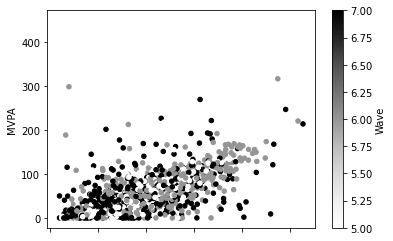

In [5]:
avg_steps_57 = fit_clean5_7[['School', 'Class', 'Child', 'Wave', 'Steps', 'Weekend', 'Sex', 'Age']].copy()
avg_mvpa_57 = fit_clean5_7[['School', 'Class', 'Child', 'Wave', 'Minutes_MVPA', 'Weekend', 'Sex', 'Age']].copy()

temp = avg_steps_57.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 0]
week_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 1]
weekend_days.columns = ['Child', 'Wave', 'Weekend_steps']
week_days.columns = ['Child', 'Wave', 'Week_steps']

avg_steps_57 = avg_steps_57.groupby(['Child', 'Wave']).mean()
avg_steps_57.columns = ['School', 'Class', 'Steps', 'Sex', 'Age']
avg_steps_57 = avg_steps_57.reset_index()
avg_steps_57 = avg_steps_57.merge(weekend_days, how = 'left')
avg_steps_57 = avg_steps_57.merge(week_days, how = 'left')

temp = avg_mvpa_57.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 0]
week_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 1]
weekend_mvpa.columns = ['Child', 'Wave', 'Weekend_MVPA']
week_mvpa.columns = ['Child', 'Wave', 'Week_MVPA']

avg_mvpa_57 = avg_mvpa_57.groupby(['Child', 'Wave']).mean()
avg_mvpa_57.columns = ['School', 'Class', 'MVPA', 'Sex', 'Age']
avg_mvpa_57 = avg_mvpa_57.reset_index()
avg_mvpa_57 = avg_mvpa_57.merge(weekend_mvpa, how = 'left')
avg_mvpa_57 = avg_mvpa_57.merge(week_mvpa, how = 'left')

full_table_57 = avg_steps_57.merge(avg_mvpa_57)

display(full_table_57)
full_table_57.plot.scatter(x = 'Steps', y = 'MVPA', c = 'Wave')

In [6]:
new_table = fit_clean1_3
new_table = new_table.drop(['Wave', 'Minutes_MVPA', 'Weekend'], axis = 1)
new_table["Trend"] = np.nan


In [17]:
for index, row in new_table.iterrows():
    temp = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.01).trend
    new_table.loc[new_table['Child'] == row['Child'], 'Trend'] = temp
display('alpha = 0.01')
display(new_table['Trend'].value_counts())

for index, row in new_table.iterrows():
    temp = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.05).trend
    new_table.loc[new_table['Child'] == row['Child'], 'Trend'] = temp
display('alpha = 0.05')
display(new_table['Trend'].value_counts())

for index, row in new_table.iterrows():
    temp = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.10).trend
    new_table.loc[new_table['Child'] == row['Child'], 'Trend'] = temp
display('alpha = 0.1')
display(new_table['Trend'].value_counts())

for index, row in new_table.iterrows():
    temp = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.5).trend
    new_table.loc[new_table['Child'] == row['Child'], 'Trend'] = temp
display('alpha = 0.5')
display(new_table['Trend'].value_counts())


'alpha = 0.01'

no trend      4220
increasing      11
Name: Trend, dtype: int64

'alpha = 0.05'

no trend      3961
increasing     185
decreasing      85
Name: Trend, dtype: int64

'alpha = 0.1'

no trend      3750
increasing     326
decreasing     155
Name: Trend, dtype: int64

'alpha = 0.5'

no trend      2014
increasing    1463
decreasing     754
Name: Trend, dtype: int64

In [8]:
## get percentage compared to last one
"""
full_table_13['Steps_ch'] = full_table_13[(full_table_13['Wave'] % 2 == 0) | (full_table_13['Wave'] % 3 == 0)].Steps.pct_change()
full_table_13.loc[1, 'Steps_ch'] = (full_table_13.iloc[1].Steps - full_table_13.iloc[0].Steps) / full_table_13.iloc[0].Steps

full_table_13['MVPA_ch'] = full_table_13[(full_table_13['Wave'] % 2 == 0) | (full_table_13['Wave'] % 3 == 0)].MVPA.pct_change()
full_table_13.loc[1, 'MVPA_ch'] = (full_table_13.iloc[1].MVPA - full_table_13.iloc[0].MVPA) / full_table_13.iloc[0].MVPA
full_table_13 = full_table_13.replace([np.inf, -np.inf], np.nan)

display(full_table_13)"""

"\nfull_table_13['Steps_ch'] = full_table_13[(full_table_13['Wave'] % 2 == 0) | (full_table_13['Wave'] % 3 == 0)].Steps.pct_change()\nfull_table_13.loc[1, 'Steps_ch'] = (full_table_13.iloc[1].Steps - full_table_13.iloc[0].Steps) / full_table_13.iloc[0].Steps\n\nfull_table_13['MVPA_ch'] = full_table_13[(full_table_13['Wave'] % 2 == 0) | (full_table_13['Wave'] % 3 == 0)].MVPA.pct_change()\nfull_table_13.loc[1, 'MVPA_ch'] = (full_table_13.iloc[1].MVPA - full_table_13.iloc[0].MVPA) / full_table_13.iloc[0].MVPA\nfull_table_13 = full_table_13.replace([np.inf, -np.inf], np.nan)\n\ndisplay(full_table_13)"

In [9]:
## get percentage compared to last one
## now for 5-7
"""
full_table_57['Steps_ch'] = full_table_57[(full_table_57['Wave'] % 6 == 0) | (full_table_57['Wave'] % 7 == 0)].Steps.pct_change()
full_table_57.loc[1, 'Steps_ch'] = (full_table_57.iloc[1].Steps - full_table_57.iloc[0].Steps) / full_table_57.iloc[0].Steps

full_table_57['MVPA_ch'] = full_table_57[(full_table_57['Wave'] % 6 == 0) | (full_table_57['Wave'] % 7 == 0)].MVPA.pct_change()
full_table_57.loc[1, 'MVPA_ch'] = (full_table_57.iloc[1].MVPA - full_table_57.iloc[0].MVPA) / full_table_57.iloc[0].MVPA
full_table_57 = full_table_57.replace([np.inf, -np.inf], np.nan)

display(full_table_57)"""

"\nfull_table_57['Steps_ch'] = full_table_57[(full_table_57['Wave'] % 6 == 0) | (full_table_57['Wave'] % 7 == 0)].Steps.pct_change()\nfull_table_57.loc[1, 'Steps_ch'] = (full_table_57.iloc[1].Steps - full_table_57.iloc[0].Steps) / full_table_57.iloc[0].Steps\n\nfull_table_57['MVPA_ch'] = full_table_57[(full_table_57['Wave'] % 6 == 0) | (full_table_57['Wave'] % 7 == 0)].MVPA.pct_change()\nfull_table_57.loc[1, 'MVPA_ch'] = (full_table_57.iloc[1].MVPA - full_table_57.iloc[0].MVPA) / full_table_57.iloc[0].MVPA\nfull_table_57 = full_table_57.replace([np.inf, -np.inf], np.nan)\n\ndisplay(full_table_57)"

In [10]:
#socio
################################################################################################################################
socio_gbl_123 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_global_waves123.xlsx", sep= ';')
socio_gbl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_global_waves567.xlsx", sep= ';')
socio_lcl_123 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_local_waves123.xlsx", sep= ';')
socio_lcl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_local_waves567.xlsx", sep= ';')

socio_lcl_123 = socio_lcl_123.rename(columns={"Node": "Child"})
socio_lcl_123 = socio_lcl_123.drop(['Unnamed: 0', 'ClusteringC'], axis = 1)
socio_gbl_123 = socio_gbl_123.drop(['Unnamed: 0'], axis = 1)

socio_lcl_567 = socio_lcl_567.rename(columns={"Node": "Child"})
socio_lcl_567 = socio_lcl_567.drop(['Unnamed: 0', 'ClusteringC'], axis = 1)
socio_gbl_567 = socio_gbl_567.drop(['Unnamed: 0'], axis = 1)

In [11]:
full_table_13 = full_table_13.merge(socio_gbl_123)
full_table_13 = full_table_13.merge(socio_lcl_123)
display(full_table_13)

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector
0,1222,1,25,67,6906.333333,1,11.0,3498.0,8610.500000,0.000000,0.000000,0.000000,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
1,1222,2,25,67,6047.666667,1,12.0,NaN,6047.666667,10.000000,NaN,10.000000,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
2,1222,3,25,67,4186.000000,1,12.0,2273.5,8011.000000,3.333333,0.000000,10.000000,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
3,1224,1,25,67,6971.000000,1,12.0,7248.0,6555.500000,22.000000,24.333333,18.500000,1.330065,0.669935,205,18,0.017039,0.772727,1.294118,0.240811
4,1224,2,25,67,9913.600000,1,12.0,NaN,9913.600000,20.000000,NaN,20.000000,1.330065,0.669935,205,18,0.017039,0.772727,1.294118,0.240811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3191,2,40,135,10548.250000,1,9.0,10799.0,10297.500000,44.250000,40.000000,48.500000,1.111111,0.888889,272,18,0.016198,1.000000,2.000000,0.262937
1076,3191,3,40,135,8701.000000,1,10.0,12417.0,6843.000000,54.666667,111.000000,26.500000,1.111111,0.888889,272,18,0.016198,1.000000,2.000000,0.262937
1077,3192,1,40,135,10895.750000,0,10.0,10097.0,11162.000000,50.500000,31.000000,57.000000,1.111111,0.888889,272,18,0.000000,0.739130,1.588235,0.167689
1078,3192,2,40,135,10053.250000,0,10.0,5043.0,11723.333333,43.250000,0.000000,57.666667,1.111111,0.888889,272,18,0.000000,0.739130,1.588235,0.167689


In [12]:
#Add socio data to the full table of week 5-7
full_table_57 = full_table_57.merge(socio_gbl_567)
full_table_57 = full_table_57.merge(socio_lcl_567)
display(full_table_57)

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector
0,1414,5,26,74,5461.000000,0,11.0,NaN,5461.000000,66.666667,NaN,66.666667,0.814103,0.570513,89,13,0.001515,0.592593,1.000000,0.277652
1,1414,6,26,74,10157.000000,0,12.0,12940.0,8765.500000,102.333333,123.0,92.000000,0.814103,0.570513,89,13,0.001515,0.592593,1.000000,0.277652
2,1414,7,26,74,5191.333333,0,12.0,4178.0,5698.000000,24.666667,61.0,6.500000,0.814103,0.570513,89,13,0.001515,0.592593,1.000000,0.277652
3,1420,5,26,74,10688.000000,0,12.0,NaN,10688.000000,30.666667,NaN,30.666667,0.814103,0.570513,89,13,0.024387,0.592593,1.583333,0.277652
4,1420,6,26,74,10257.000000,0,12.0,9363.0,10480.500000,50.200000,22.0,57.250000,0.814103,0.570513,89,13,0.024387,0.592593,1.583333,0.277652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,6159,6,30,308,10498.333333,0,11.0,6469.0,12513.000000,60.000000,37.0,71.500000,1.208791,0.791209,144,14,0.032685,0.928571,1.923077,0.302602
2141,6159,7,30,308,10921.666667,0,11.0,8464.0,12150.500000,55.000000,80.0,42.500000,1.208791,0.791209,144,14,0.032685,0.928571,1.923077,0.302602
2142,6161,5,30,308,15449.200000,0,10.0,16579.5,14695.666667,115.000000,116.5,114.000000,1.208791,0.791209,144,14,0.037218,1.000000,1.846154,0.323210
2143,6161,6,30,308,8337.750000,0,10.0,5815.0,9178.666667,8.000000,0.0,10.666667,1.208791,0.791209,144,14,0.037218,1.000000,1.846154,0.323210


In [13]:
#questions
#plan is to remove the dates and just make each of them have a column representing the wave this was in
q_w1= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W1_Main_questions.csv", sep= ';')
q_w2= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W2_Main_questions.csv", sep= ';')
q_w3= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W3_Main_questions.csv", sep= ';')
q_w5= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W5_Main_questions.csv", sep= ';')
q_w6= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W6_Main_questions.csv", sep= ';')
q_w7= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W7_Main_questions.csv", sep= ';')

q_w1 = q_w1[q_w1['Child'].isin(participants1_3)].fillna(0)
q_w2 = q_w2[q_w2['Child'].isin(participants1_3)].fillna(0)
q_w3 = q_w3[q_w3['Child'].isin(participants1_3)].fillna(0)

q_w123 = q_w1.append([q_w2, q_w3])
q_w567 = q_w5.append([q_w6, q_w7]) 

q_w123 = q_w123.set_index('Child').dropna(axis = 'columns')
q_w567 = q_w567.set_index('Child')

q_w123 = q_w123[q_w123.columns.drop(q_w123.filter(regex='TriggerTime'))]
display(q_w123.columns)

Index(['ME_TV_Exposure_TriggerDate', 'ME_TV_Exposure_Weekend', 'ME_TV_Exposure_ME_TV_days', 'ME_TV_Exposure_ME_TV_hours', 'ME_TV_Exposure_ME_expo_TV1', 'ME_TV_Exposure_ME_expo_TV2',
       'ME_TV_Exposure_ME_expo_TV3', 'ME_TV_Exposure_ME_expo_ned1', 'ME_TV_Exposure_ME_expo_ned2', 'ME_TV_Exposure_ME_expo_ned3', 'ME_TV_Exposure_ME_expo_rtl4', 'ME_TV_Exposure_ME_expo_rtl5',
       'ME_TV_Exposure_ME_expo_sbs6', 'ME_TV_Exposure_ME_expo_rtl7', 'ME_TV_Exposure_ME_expo_disnXD', 'ME_TV_Exposure_ME_expo_cartN', 'ME_TV_Exposure_ME_expo_NATG', 'ME_TV_Exposure_ME_expo_Disc_ch',
       'ME_TV_Exposure_ME_expo_MTV', 'ME_TV_Exposure_ME_expo_TLC', 'ME_TV_Exposure_ME_expo_Nick', 'ME_TV_Exposure_ME_expo_rtl8', 'ME_TV_Exposure_ME_expo_Vero', 'ME_TV_Exposure_ME_expo_Net5',
       'PA_Attitude_TriggerDate', 'PA_Attitude_Weekend', 'PA_Attitude_Attitude_PA1', 'PA_Attitude_Attitude_PA2', 'PA_Attitude_Attitude_PA3', 'Fill_happiness_D04_TriggerDate',
       'Fill_happiness_D04_Weekend', 'Fill_happiness_D04_happ

In [14]:
#full table 1-3 analysis
"""
full_table_13.describe()
full_table_13.plot.scatter(y = 'Steps', x = 'Steps_ch', c = 'Wave', colormap='Paired')
"""

"\nfull_table_13.describe()\nfull_table_13.plot.scatter(y = 'Steps', x = 'Steps_ch', c = 'Wave', colormap='Paired')\n"

In [15]:
#full table 5-7 analysis
full_table_57.describe()

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,1846.000000,2145.000000,2145.000000,1846.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,4696.313287,6.000000,41.541259,226.309091,9684.506286,0.528671,11.220513,8962.075930,9991.932393,50.503069,46.264175,51.963124,1.363200,0.614115,245.272727,20.039161,0.023659,0.714637,1.243154,0.223927
std,1539.639501,0.816687,10.999546,85.174300,3871.650360,0.499294,1.269383,4905.462804,4354.274432,39.191519,46.501414,43.090652,0.177350,0.106717,120.829305,5.203808,0.030283,0.109794,0.349425,0.068339
min,1414.000000,5.000000,26.000000,74.000000,1000.000000,0.000000,9.000000,1000.000000,1000.000000,0.000000,0.000000,0.000000,0.814103,0.415789,21.000000,6.000000,0.000000,0.377358,0.391304,0.040852
25%,3189.000000,5.000000,33.000000,131.000000,7013.000000,0.000000,10.000000,5444.375000,7082.000000,22.600000,11.000000,21.000000,1.272727,0.523810,160.000000,17.000000,0.005754,0.638889,0.958333,0.180332
50%,5221.000000,6.000000,39.000000,263.000000,9402.000000,1.000000,11.000000,8501.750000,9663.500000,42.000000,34.000000,41.500000,1.361111,0.633333,241.000000,20.000000,0.014205,0.715976,1.230769,0.224833
75%,5928.000000,7.000000,54.000000,297.000000,12135.000000,1.000000,12.000000,11937.125000,12534.250000,69.800000,67.000000,72.500000,1.467949,0.691176,314.000000,24.000000,0.030002,0.789474,1.538462,0.265736
max,6161.000000,7.000000,59.000000,308.000000,26317.500000,1.000000,16.000000,33760.500000,29977.000000,450.000000,374.000000,450.000000,1.775735,0.857143,483.000000,29.000000,0.309524,1.000000,2.000000,0.506293
